<a href="https://www.kaggle.com/code/mosesmoncy/mall-customer-segmentation-kmeans?scriptVersionId=128190464" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Context

This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.



Content

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.

Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.



Problem Statement

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.



By the end of this case study , you would be able to answer below questions.

1- How to achieve customer segmentation using machine learning algorithm (KMeans Clustering) in Python in simplest way.

2- Who are your target customers with whom you can start marketing strategy [easy to converse]

3- How the marketing strategy works in real world

**

In [1]:
import pandas as pd
import numpy as np
a=pd.read_csv('/kaggle/input/mall-customerscsv/Mall_Customers.csv')
a

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
a.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
a.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [4]:
a.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
a.shape

(200, 5)

In [6]:
a.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Since it is based on MARKET SEGMENTATION, there is no direct importance on "Gender"& "CustomerID"
Annual Income (k$)  Spending Score (1-100) are formed into clusters


In [7]:
x=a.drop(['CustomerID','Gender','Age'],axis=1)

In [8]:
x # this dataset only contains annual income and spending score should be turmed into clusters

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Calculation of clusters(K)

In [9]:
# Number of Clusters
from sklearn.cluster import KMeans
vc=[]  # empty list to collect the variance
for i in range(1,11):   # clusters
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    #since we have only input, we are making a model with it
    kmeans.fit(x)
    # we use'inertia' to calculate the variance and append(add) to the empty list'vc'
    vc.append(kmeans.inertia_)

vc # shows the variance of 10 clusters 

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.839349156595,
 21850.165282585633,
 19672.072849014316]

WE MUST DRAW A GRAPH B/W VARIANCE(vc) and CLUSTERS(i), to find the elbow point

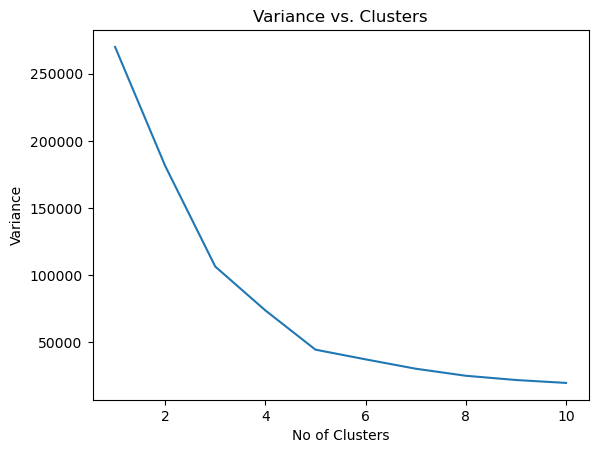

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),vc)
plt.xlabel("No of Clusters")
plt.ylabel("Variance")
plt.title("Variance vs. Clusters")
plt.show()

HERE WE CAN SEE AFTER K=5, THERE IS A SUDDEN CHANGE IN VARIANCE
SO WE NEED NO OF CLUSTERS =5


In [11]:
# model creation

kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
kmeans.fit(x)
y_pred=kmeans.fit_predict(x)
y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [12]:
# since we found the cluster output
# we are gonna append this cluster output to 'x'(inputs)

x['cluster output']=y_pred
x

,Annual Income (k$),Spending Score (1-100),cluster output
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


In [13]:
x.isna().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
cluster output            0
dtype: int64

In [14]:
# now we are going to use Supervised Machine Learning Algorithm to find the output

X=x.iloc[:,:-1]
Y=x.iloc[:,-1]
Y

0      2
1      3
2      2
3      3
4      2
      ..
195    4
196    1
197    4
198    1
199    4
Name: cluster output, Length: 200, dtype: int32

In [15]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [16]:
# Implementing train_test_split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=42)
x_train

,Annual Income (k$),Spending Score (1-100)
169,87,63
97,60,50
31,30,73
12,20,15
35,33,81
...,...,...
106,63,50
14,20,13
92,60,49
179,93,90


In [17]:
y_train

169    4
97     0
31     3
12     2
35     3
      ..
106    0
14     2
92     0
179    4
102    0
Name: cluster output, Length: 140, dtype: int32

In [18]:
# classification model

from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=9,weights='uniform')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 3, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 4, 0, 1, 4, 0, 1, 0, 0, 0, 2,
       1, 0, 0, 0, 0, 0, 4, 0, 3, 2, 0, 0, 1, 0, 4, 4, 1, 0, 0, 4, 2, 2,
       0, 4, 3, 3, 4, 0, 0, 4, 3, 0, 0, 0, 1, 0, 1, 0], dtype=int32)

In [19]:
# accuracy score
from sklearn.metrics import accuracy_score
print('accuracy score is',accuracy_score(y_test,y_pred))

accuracy score is 0.9666666666666667
